## 연습문제

### EDA

1. 다음 데이터를 탐색적 분석하세요  
age : 나이, job : 직업, marital : 결혼상태, education : 학력, default : 신용 불이행 여부, balance : 은행잔고  
housing : 부동산 대출 여부, loan : 개인 대출 여부, contact : 연락 수단, month : 마지막 연락한 달  
y : 고객의 정기예금 가입 여부(종속변수)

In [ ]:
import pandas as pd

df = pd.read_csv('./data/practice1_bank.csv')
df.head()
# 기본 정보 확인
df.info()

## 결측치는 존재하지 않고 질적변수가 job, marital, education, default, housing, loan, contact, month, y 이다.
## 양적변수는 age, balance 이다.
# 기술 통계량 확인
df.describe(include=['int64'])
# 기술 통계량 확인
df.describe(include=['object'])

## 대부분의 사람이 신용불량자가 아님을 알 수 있다.
qual = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']
quan = ['age', 'balance']

# 질적변수 시각화
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize = (15, 10))
plt.subplots_adjust(wspace= 0.5, hspace= 0.5)

for i, col in enumerate(qual):
    axes[i // 3, i % 3].barh(df[col].value_counts().index, df[col].value_counts().values)
    axes[i // 3, i % 3].set_title(col)
# 양적변수 시각화
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
plt.subplots_adjust(wspace= 0.5, hspace= 0.5)

for i, col in enumerate(quan):
    axes[i, 0].hist(df[col])
    axes[i, 1].boxplot(df[col], vert = False)
    axes[i, 0].set_title(col)
    axes[i, 1].set_title(col)

2. 어느 회사의 연도별 임금상승률이다. 평균 임금상승률을 구하기 위해 어떤 대표값을 설정해야하는가?  
data = [0.04, 0.04, 0.05, 0.10, 0.08]

In [ ]:
from scipy.stats.mstats import gmean

data = [0.04, 0.03, 0.05, 0.10, 0.08]
data1 = [1+x for x in data]
gmean(data1) - 1

# 평균 임금상승률은 5.9%

3. 출근할 때 시속 3km/h, 퇴근할 때 시속 6km/h 일 때 평균속도를 구하라

In [ ]:
# 평균속도를 구할 때는 조화평균을 사용한다.
from scipy.stats.mstats import hmean

hmean([3, 6]) # 평균속도는 4km/h

4. A = [200, 49], B = [190, 36] 방금 구매한 A, B 물품이 모두 210 이라면 상대적으로 어느 것이 더 무거운가? [평균, 분산]

In [ ]:
# 표준화한 점수로 비교하자.

import numpy as np
z1 = (210-200) / np.sqrt(49)
z2 = (210-190) / np.sqrt(36)

z1, z2 # z2 가 더 크므로 z2가 상대적으로 더 무겁다.

5. A = [10, 1], B = [8, 1] A와 B 중 어느 것의 용돈 격차가 더 심한가? [평균, 표준편차]

In [ ]:
# 변동계수를 이용해 단위가 다른 두 집단의 차이를 비교
a = 2 / 10
b = 1 / 8

a, b # a가 변동계수가 더 크므로 a가 용돈 격차가 더 심하다.

### 전처리

1. 데이터의 결측치와 이상치를 확인하고 합리적인 전처리를 진행하라

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/practice1_bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,month,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,no
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,jul,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,may,no
4518,57,technician,married,secondary,no,295,no,no,cellular,aug,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,feb,no


In [30]:
# 결측치 확인
df.info() # 결측치는 없는 것으로 보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  y          4521 non-null   object
dtypes: int64(2), object(9)
memory usage: 388.6+ KB


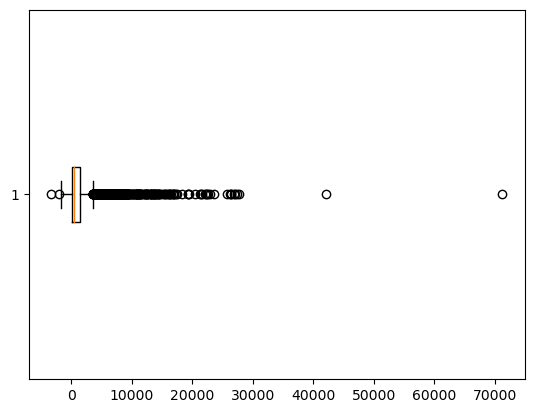

In [31]:
# 양적변수인 balance 의 데이터 분포를 확인하자.
plt.boxplot(df.balance, vert = False)
plt.show()

# 이상치로 보이는 데이터가 존재한다.
# IQR 방식으로 이상치를 확인해보자.

In [33]:
IQR = df.balance.quantile(0.75) - df.balance.quantile(0.25)
top = df.balance.quantile(0.75) + 1.5*IQR
down = df.balance.quantile(0.25) - 1.5*IQR

# 이상치 값 찾기
outlier = df[(df.balance > top) | (df.balance < down)]
outlier.balance

1       4789
10      9374
16      4073
25      5883
30      4189
        ... 
4464    4554
4473    4790
4489    6945
4500    4196
4517   -3313
Name: balance, Length: 506, dtype: int64

In [ ]:
# 이상치 처리하기
## 위에서 정의한 top, down 을 벗어나는 데이터를 top, down 으로 이동해준다.
top_index = df[(df.balance > top)].balance.index
down_index = df[(df.balance < down)].balance.index
df.loc[top_index, 'balance'] = np.nan
df.loc[top_index, 'balance'] = top
df.loc[down_index, 'balance'] = np.nan
df.loc[down_index, 'balance'] = down

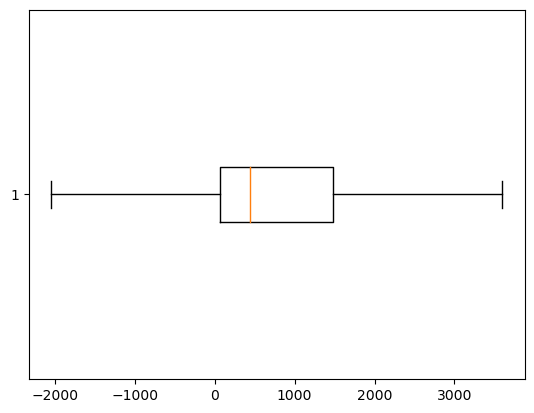

In [28]:
# balance 의 데이터 분포를 다시 확인하자.
plt.boxplot(df.balance, vert = False)
plt.show()

# 이상치가 사라졌음을 알 수 있다.

2. 범주형 변수를 전처리 하는 방법을 2가지 이상 설명하고, 각 범주형 변수에 대한 적절한 전처리를 진행하세요

레이블 인코딩
+ 문자열인 수준들을 숫자로 매핑하는 변수변환이다. 서열척도 변수에 사용한다.

더미코딩
+ 범주형 변수의 수준의 개수보다 한 개 적게 변수를 만들어서 다중공선성을 방지하도록 가변수를 만드는 방법이다.
+ 수준이 너무 많게 되면 특징의 개수도 많아져서 학습 시간이나 메모리가 급증할 수 있다.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  y          4521 non-null   object
dtypes: int64(2), object(9)
memory usage: 388.6+ KB


In [36]:
df.describe(include= 'object')

,job,marital,education,default,housing,loan,contact,month,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,2
top,management,married,secondary,no,yes,no,cellular,may,no
freq,969,2797,2306,4445,2559,3830,2896,1398,4000


In [37]:
df['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [38]:
# 변수 수준들에 서열이 있는 경우 레이블 인코딩을 사용하고 서열이 없는 경우 더미코딩을 사용하자.
## 레이블 인코딩
col1 = ['default', 'housing', 'loan', 'y']
for col in col1:
    df[col] = df[col].map({'yes' : 1, 'no' : 0})

df['education'] = df['education'].map({'unknown' : 0, 'primary' : 1, 'secondary' : 2, 'tertiary' : 3})

## 더미코딩
df = pd.get_dummies(df, columns= ['job', 'marital', 'contact', 'month'], drop_first= True)

df.head()

,age,education,default,balance,housing,loan,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1,0,1787,0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,33,2,0,4789,1,1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,35,3,0,1350,1,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,3,0,1476,1,1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,59,2,0,0,1,0,0,True,False,False,...,False,False,False,False,False,False,True,False,False,False


3. 수치형 변수를 전처리 하는 방법을 2가지 이상 설명하고, 각 수치형 변수에 대한 적절한 전처리를 진행하세요

표준화 스케일링
+ 각 특성별로 표준점수를 구하는 변수변환 방법으로 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 한다.
+ 표준점수인 z는 원수치인 x가 평균에서 얼마나 떨어져 있는지를 나타내고 음수이면 평균이하, 양수이면 평균 이상이다.

최대최소 스케일링
+ 모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 변경하는 방법이다.
+ 변환 후의 평균이 정확히 0이 됮 않고 이상치의 영향을 받기 쉽다.

표준화 스케일링 방법을 이용하자.

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['balance'] = scaler.fit_transform(df[['balance']])

df.head()

,age,education,default,balance,housing,loan,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1,0,0.121072,0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,33,2,0,1.118644,1,1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,35,3,0,-0.024144,1,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,3,0,0.017726,1,1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,59,2,0,-0.472753,1,0,0,True,False,False,...,False,False,False,False,False,False,True,False,False,False


4. 해당 데이터에 클래스 불균형이 있는지 확인하고 그렇게 생각한 이유를 작성하세요.

In [44]:
df['y'].value_counts()

y
0    4000
1     521
Name: count, dtype: int64

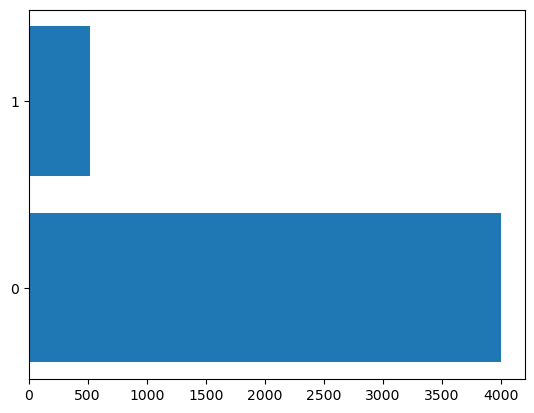

In [48]:
plt.barh(df['y'].value_counts().index,df['y'].value_counts().values)
plt.yticks(df['y'].value_counts().index)
plt.show()

# 종속변수 y 의 값 분포가 비율 차이가 약 8배 정도 나므로 클래스 불균형이 존재한다.

5. 클래스 불균형이 있는 데이터를 처리하는 방법들 중 2가지를 들어 그 방법의 장단점을 서술하고 그 중 하나를 선택하여 전처리를 진행하라

오버샘플링
+ 데이터 세트의 균형을 맞추기 위해 소수 클래스의 데이터를 다수 클래스의 데이터 수 만큼 만드는 것이다.
+ 대표적으로 랜덤 오버 샘플링과 SMOTE 이 있다.
+ 랜덤 오버샘플링은 단순 복제로 소수 클래스의 데이터 양을 늘리는 것으로 과적합의 위험이 있다.
+ SMOTE 는 KNN 알고리즘을 사용해 K개의 중간 지점에 데이터를 생성하는 것으로 오버피팅의 위험이 적지만 새로운 데이터나 작은 데이터 세트에는 사용하기 어렵다.

언더샘플링
+ 데이터 세트의 균형을 맞추기 위해 다수 클래스를 소수 클래스 수로 줄이는 것이다.
+ 대표적으로 랜덤언더샘플링이 있다.
+ 언더샘플링을 하게 되면 데이터의 정보가 손실되기 때문에 과소적합의 위험이 있으며 설명력이 떨어질 수 있다.

해당 데이터는 크기가 크지 않으므로 정보 손실의 우려로 오버샘플링이 적절하다.

In [51]:
from imblearn.over_sampling import SMOTE

X = df.drop(['y'], axis = 1)
y = df['y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3 , random_state= 42)
sm = SMOTE()
X_sm_train, y_sm_train = sm.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(y_sm_train.value_counts())

y
0    2799
1     365
Name: count, dtype: int64
y
0    2799
1    2799
Name: count, dtype: int64


### 표본추출, 데이터 분할, 교차검증

1. 랜덤포레스트 알고리즘의 파라미터 max_depth 의 후보 4개를 토대로 교차분석을 진행하고 그 결과를 표로 나타내시오

In [52]:
df = pd.read_csv('./data/practice1_bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,no


In [54]:
# 변수 인코딩을 실시하자.
# 변수 수준들에 서열이 있는 경우 레이블 인코딩을 사용하고 서열이 없는 경우 더미코딩을 사용하자.
## 레이블 인코딩
col1 = ['default', 'housing', 'loan', 'y']
for col in col1:
    df[col] = df[col].map({'yes' : 1, 'no' : 0})

df['education'] = df['education'].map({'unknown' : 0, 'primary' : 1, 'secondary' : 2, 'tertiary' : 3})

## 더미코딩
df = pd.get_dummies(df, columns= ['job', 'marital', 'contact', 'month'], drop_first= True)

df.head()

,age,education,default,balance,housing,loan,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1,0,1787,0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,33,2,0,4789,1,1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,35,3,0,1350,1,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,3,0,1476,1,1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,59,2,0,0,1,0,0,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['y'], axis = 1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state= 42)

rf_clf = RandomForestClassifier()
param_grid = {'max_depth' : [3,4,5,6]}

grid_rf = GridSearchCV(rf_clf, param_grid, cv = 5)
grid_rf.fit(X_train, y_train)

print(grid_rf.best_params_)
pd.DataFrame(grid_rf.cv_results_)

{'max_depth': 3}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.132085,0.002757,0.001564,0.001999,3,{'max_depth': 3},0.884676,0.884676,0.884676,0.884676,0.884494,0.884640,0.000073,1
1,0.133838,0.008678,0.003075,0.003235,4,{'max_depth': 4},0.884676,0.884676,0.884676,0.884676,0.884494,0.884640,0.000073,1
2,0.146015,0.002881,0.006334,0.004259,5,{'max_depth': 5},0.884676,0.884676,0.884676,0.883096,0.884494,0.884324,0.000618,3
3,0.149972,0.001527,0.005947,0.005835,6,{'max_depth': 6},0.884676,0.883096,0.884676,0.883096,0.884494,0.884008,0.000747,4


### 확률분포

1. 어느 사격선수가 과녁의 정중앙을 맞힐 확률이 80%라고 한다. 이 선수가 총 5번 사격을 할 때 평균적으로 몇번 정중앙을 맞히는지 구하시오.

In [63]:
# 이항분포 분포
from scipy.stats import binom
binom.stats(5, 0.8) # 평균 4번

(4.0, 0.7999999999999998)

2. 전체 청소년의 40%가 11시 이전에 잠을 잔다고 하면, 임의로 선택한 10명의 청소년 중에 3명이 11시 이전에 잠을 잘 확률을 계산하시오

In [70]:
# 이항분포
# 분포함수(누적확률질량함수)
binom.pmf(3, 10, 0.4)

0.21499084799999976

3. 어느 아파트 단지에서 밤 11시부터 새벽 2시 사이에 배달되는 음식 배달 건수는 시간 당 평균 5건이다.  
    음식 배달 건수의 분포가 푸아송분포를 따른다면 오늘 새벽 12시와 1시 사이에 배달이 1건만 발생할 확률을 구하라

In [69]:
x = 1
lam = 5

from scipy.stats import poisson

poisson.pmf(x, lam)

0.03368973499542734

4. A 대학교 B전공 시험의 성적 분포는 평균이 65, 표준편차 12인 정규분포를 따른다.  
    최고 점수부터 10% 까지를 A+로 분류한다면, A+ 를 받기 위해 최소 몇점을 받아야 하는가?
    

In [68]:
from scipy.stats import norm
z = norm.ppf(0.9)
# (x-65) / 12 = norm.ppf(0.9)
z * 12 + 65 # 81점

80.3786187865352

### 추정과 가설검정

1. 다음 데이터의 모분산 정보가 없을 때, 다음 데이터의 모평균에 대한 95% 신뢰수준의 신뢰구간을 구하시오. 또한, 다음 데이터의 모표준편차가 3이라는 것을 알고 있을 때, 다음 데이터의 모평균에 대한 95% 신뢰수준의 신뢰구간을 구하시오.

data = [10, 19, 15, 11, 13, 14, 18]

In [10]:
data = [10, 19, 15, 11, 13, 14, 18]

# 모분산 정보가 없을 때
import numpy as np
from scipy.stats import t, norm

x = np.mean(data) # 표본평균
n = len(data) # 표본 크기
s = np.std(data, ddof = 1) # 표본표준편차
conf_a = 0.05
df = n-1

SE = s / np.sqrt(n)
conf_t = t.ppf(1 - conf_a/2, df)
ME = conf_t*SE

print('신뢰구간 {} ~ {}'.format(x-ME, x+ME))

# 모분산 정보가 있을 때
sigma = 3
conf_z = norm.ppf(1-conf_a/2)
SE = sigma / np.sqrt(n)
ME = conf_z * SE

print('신뢰구간 {} ~ {}'.format(x-ME, x+ME))

신뢰구간 11.185329064313652 ~ 17.38609950711492
신뢰구간 12.063324022113047 ~ 16.508104549315526


2. 어느 제조회사의 불량률이 5%로 알려져 있다면, 95% 신뢰수준에서 오차의 한계가 3%가 되도록 하는 최소표본 사이즈를 구하시오.

In [11]:
p = 0.05

ME = 0.03
conf_a = 0.05
zstats = norm.ppf(1-conf_a/2)
# SE = np.sqrt(p*(1-p) / n)

# ME < zstats*SE

size = p*(1-p)*zstats**2 / ME**2 # 203개

202.74365998107885

3. 임의로 추출한 표본 30개의 분산을 계산했더니 50일 때, 신뢰도 95%로 모분산의 신뢰구간을 추정하시오.

In [17]:
from scipy.stats import chi2
n = 30
v = 50
df = n-1
conf_a = 0.05

conf_c1 = chi2.ppf(1-conf_a/2, df)
conf_c2 = chi2.ppf(conf_a/2, df)

CI1 = df * v / conf_c1
CI2 = df * v / conf_c2

print('신뢰구간 {:.2f} ~ {:.2f}'.format(CI1, CI2))

신뢰구간 31.71 ~ 90.36


4. 어느 뽑기 기계에서 20번 뽑기를 했더니 5개가 미니카였다. 해당 뽑기 기계에 있는 장난가들 중 미니카의 비율을 P라고 하면, 모비율 P에 대한 95% 신뢰구간을 구하시오.

In [18]:
p = 5 / 20 # 표본비율
n = 20

conf_a = 0.05
zstats = norm.ppf(1-conf_a/2)
SE = np.sqrt(p*(1-p) / n)
ME = zstats * SE

print('신뢰구간 {} ~ {}'.format(p-ME, p+ME))

신뢰구간 0.060227303217750994 ~ 0.439772696782249


5. A 국가의 성인 남성의 흡연율이 35% 라고 발표하였으나 B는 그것보다 더 높은 수치를 예상했다. 이에 성인 남성 중 450명을 임의 추출하여 조사한 결과 180명이 흡연자인 것을 확인하였다. 이에 대하여 귀무가설과 대립가설을 세우고, 검정통계량을 계산하여 검정 결과를 서술하시오.

In [20]:
# H0 : 성인 남성의 흡연율이 35% 이다.
# H1 : 성인 남성의 흡연율이 35% 보다 크다.
# 단측 검정
n = 450
p = 180 / 450 # 표본비율
p0 = 0.35
test_a = 0.05

SE = np.sqrt(p0*(1-p0) / n)
zstats = (p - p0) / SE

sp = 1-norm.cdf(zstats)
cv = norm.ppf(1-test_a)

print('임계값 : {}, 검정통계량 : {}'.format(cv, zstats))
print('유의수준 :{}, 유의확률 :{}'.format(test_a, sp))

# 유의확률이 유의수준 0.05보다 작으므로 귀무가설을 기각. 즉 성인 남성의 흡연율이 35% 보다 크다.

임계값 : 1.6448536269514722, 검정통계량 : 2.2237479499833053
유의수준 :0.05, 유의확률 :0.013082703570710397


6. 모평균을 모르는 상황에서 표본의 정보를 통해 모분산이 10인지 아닌지 여부를 검정하고자 한다. 50개의 표본을 임의로 추출하여 계산한 결과 표본의 분산은 8.8로 나타났다. 이에 대해 귀무가설과 대립가설을 세우고, 검정통계량을 계산하여 검정 결과를 서술하시오. (유의수준 0.05)

In [21]:
# H0 : 모분산이 10이다.
# H1 : 모분산이 10이 아니다.

from scipy.stats import chi2
n = 50
v = 8.8
df = n-1
v0 = 10
test_a = 0.05

cstats = df*v / v0

if chi2.cdf(cstats, df) < 0.5:
    sp = chi2.cdf(cstats, df)*2
else:
    sp = (1-chi2.cdf(cstats, df))*2

cv1 = chi2.ppf(test_a /2, df)

0.29066626821562375